# Etapa 1 CRISP - DM: Entendimento do negócio
## Objetivo do Projeto
O objetivo deste projeto é desenvolver um modelo de previsão de renda com base em diversos atributos dos clientes. A ideia é utilizar técnicas de aprendizado de máquina para criar um modelo que possa estimar a renda de um indivíduo com base em características como sexo, posse de veículo, posse de imóvel, entre outras.

## Justificativa
A previsão de renda é uma ferramenta valiosa para diversas aplicações, incluindo análises de crédito, segmentação de mercado e tomada de decisões financeiras. Com um modelo preciso, podemos otimizar processos e melhorar a eficácia das decisões relacionadas à concessão de crédito e serviços financeiros.

## Stakeholders
Os principais stakeholders deste projeto incluem equipes de análise de crédito, tomadores de decisão financeira e qualquer pessoa envolvida na estratégia de marketing baseada no perfil de renda dos clientes.



# Etapa 2 Crisp-DM: Entendimento dos dados

In [ ]:
# @title Dicionário de Dados
from prettytable import PrettyTable

# Criando a tabela
tabela = PrettyTable()

# Definindo os campos
campos = ["Variável", "Descrição", "Tipo"]

# Adicionando os campos à tabela
tabela.field_names = campos

# Adicionando os dados à tabela
dados = [
    ["data_ref", "Data de referência do registro", "Data"],
    ["id_cliente", "Identificador único do cliente", "Numérico"],
    ["sexo", "Gênero do cliente", "Categórico"],
    ["posse_de_veiculo", "Indica se o cliente possui veículo", "Binário"],
    ["posse_de_imovel", "Indica se o cliente possui imóvel", "Binário"],
    ["qtd_filhos", "Número de filhos do cliente", "Numérico"],
    ["tipo_renda", "Tipo de renda do cliente", "Categórico"],
    ["educacao", "Nível de educação do cliente", "Categórico"],
    ["estado_civil", "Estado civil do cliente", "Categórico"],
    ["tipo_residencia", "Tipo de residência do cliente", "Categórico"],
    ["idade", "Idade do cliente", "Numérico"],
    ["tempo_emprego", "Tempo de emprego em anos", "Numérico"],
    ["qt_pessoas_residencia", "Número de pessoas na residência do cliente", "Numérico"],
    ["renda", "Renda do cliente", "Numérico"]
]

for linha in dados:
    tabela.add_row(linha)

# Exibindo a tabela
print(tabela)


+-----------------------+--------------------------------------------+------------+
|        Variável       |                 Descrição                  |    Tipo    |
+-----------------------+--------------------------------------------+------------+
|        data_ref       |       Data de referência do registro       |    Data    |
|       id_cliente      |       Identificador único do cliente       |  Numérico  |
|          sexo         |             Gênero do cliente              | Categórico |
|    posse_de_veiculo   |     Indica se o cliente possui veículo     |  Binário   |
|    posse_de_imovel    |     Indica se o cliente possui imóvel      |  Binário   |
|       qtd_filhos      |        Número de filhos do cliente         |  Numérico  |
|       tipo_renda      |          Tipo de renda do cliente          | Categórico |
|        educacao       |        Nível de educação do cliente        | Categórico |
|      estado_civil     |          Estado civil do cliente           | Categ

## Carregando os pacotes


In [ ]:
!pip install pandas-profiling
!pip install --upgrade pydantic
!pip install pydantic-settings
!pip install --upgrade pandas-profiling
!pip show pydantic pydantic-settings
!pip show pandas_profiling pydantic pydantic-settings
!pip uninstall pandas-profiling
!pip install ydata-profiling

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport

## Carregando os dados

In [ ]:
renda = pd.read_csv('/content/sample_data/previsao_de_renda.csv')
renda.head(1)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24


## Entendimento dos dados - Univariada

In [ ]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import os

# Create the directory if it doesn't exist
output_dir = './content/output/'
os.makedirs(output_dir, exist_ok=True)

# Save the file
prof.to_file(os.path.join(output_dir, 'renda_analisys.html'))


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Entendimento dos dados - Bivariadas

## Análise Bivariada
Correlação entre Variáveis Numéricas:
Vamos analisar a correlação entre as variáveis numéricas, como idade, tempo de emprego, número de filhos, quantidade de pessoas na residência e renda. Isso pode nos ajudar a identificar padrões ou relações lineares entre essas variáveis.
python


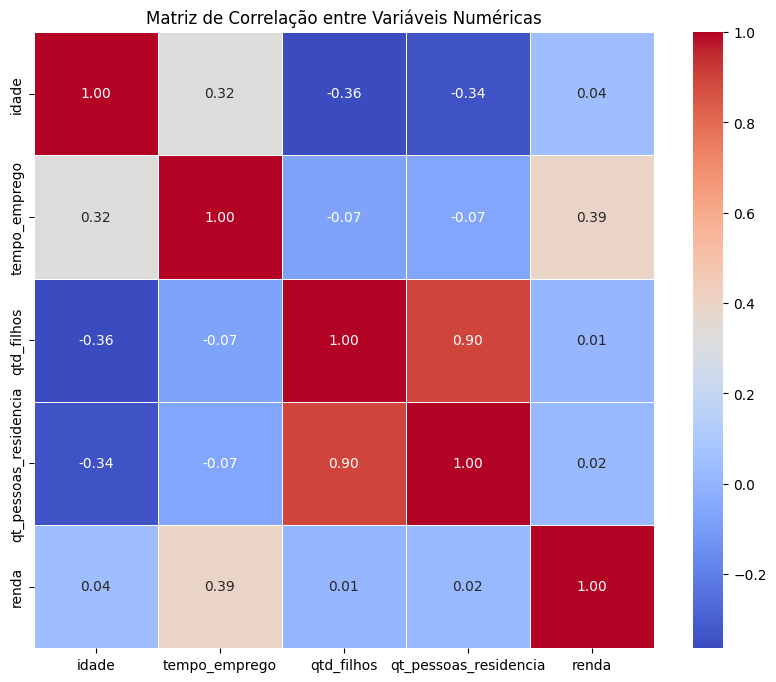

In [ ]:
# Correlação entre variáveis numéricas
correlation_matrix = renda[['idade', 'tempo_emprego', 'qtd_filhos', 'qt_pessoas_residencia', 'renda']].corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

## Distribuição de Renda por Gênero:
Vamos visualizar a distribuição da renda em relação ao gênero dos clientes para entender se há diferenças significativas.

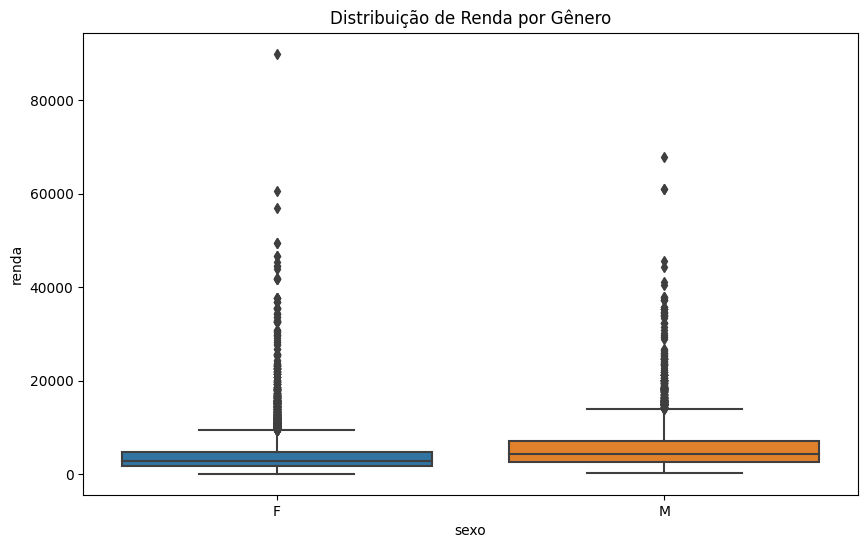

In [ ]:
# Boxplot da renda por gênero
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='renda', data=renda)
plt.title('Distribuição de Renda por Gênero')
plt.show()

## Distribuição de Renda por Tipo de Residência:
Analisaremos a variação da renda com base no tipo de residência dos clientes.

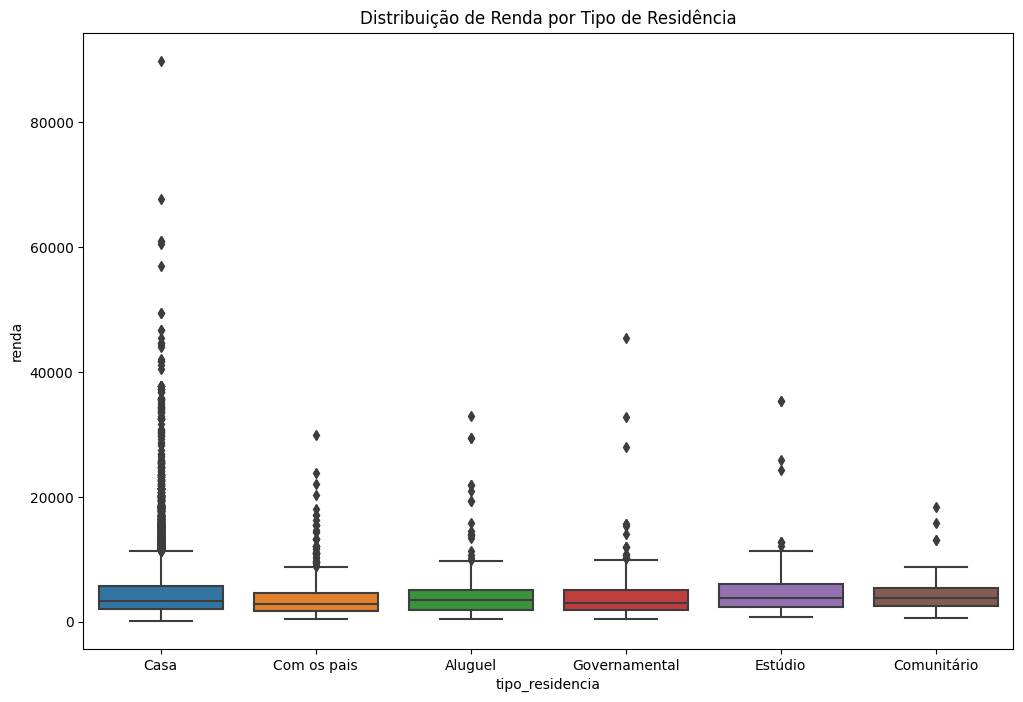

In [ ]:
# Boxplot da renda por tipo de residência
plt.figure(figsize=(12, 8))
sns.boxplot(x='tipo_residencia', y='renda', data=renda)
plt.title('Distribuição de Renda por Tipo de Residência')
plt.show()

## Distribuição de Renda por Estado Civil:
Exploraremos a relação entre a renda e o estado civil dos clientes.

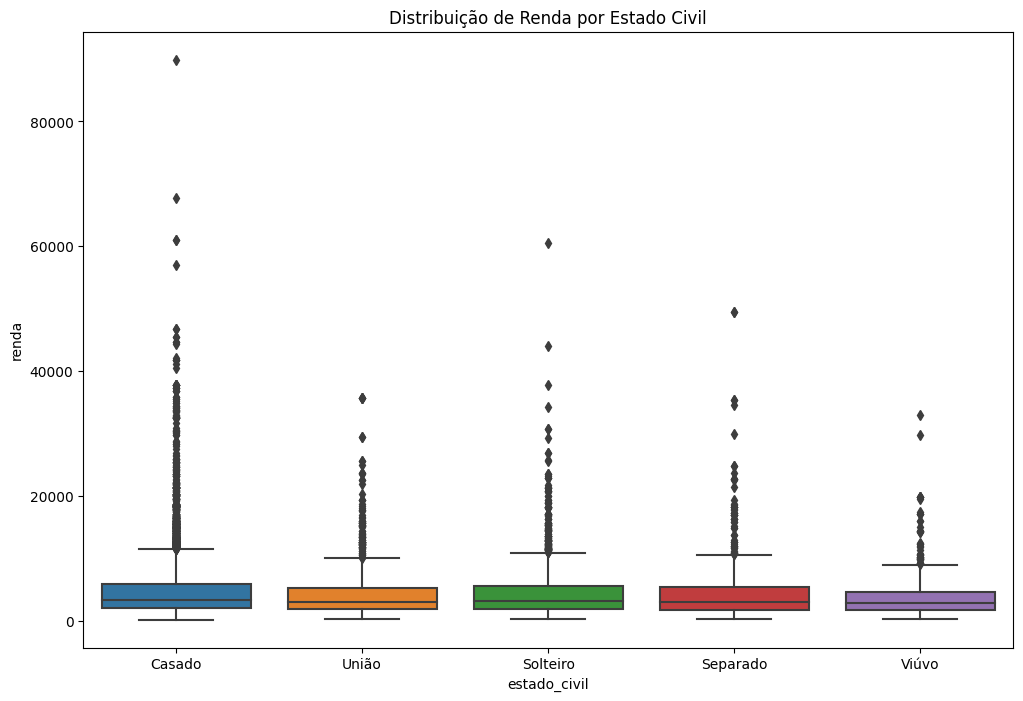

In [ ]:
# Boxplot da renda por estado civil
plt.figure(figsize=(12, 8))
sns.boxplot(x='estado_civil', y='renda', data=renda)
plt.title('Distribuição de Renda por Estado Civil')
plt.show()

# Etapa 3 CRISP-DM: Preparação dos Dados

In [ ]:
# Verificando dados faltantes
dados_faltantes = renda.isnull().sum()
print("Dados faltantes por variável:\n", dados_faltantes)

Dados faltantes por variável:
 Unnamed: 0                  0
data_ref                    0
df_index                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64


In [ ]:
# Exemplo de construção de nova variável
renda['renda_por_pessoa'] = renda['renda'] / renda['qt_pessoas_residencia']

In [ ]:
# Aplicando one-hot encoding em variáveis categóricas
renda = pd.get_dummies(renda, columns=['sexo', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

# Etapa 4 Crisp-DM: Modelagem

## Rodando o modelo

In [ ]:
from sklearn.impute import SimpleImputer

# Criando um imputador
imputer = SimpleImputer(strategy='mean')

# Aplicando a imputação às colunas numéricas no conjunto de treino
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Aplicando a imputação ao conjunto de teste usando os parâmetros aprendidos no conjunto de treino
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Inicializando o modelo de Regressão Linear
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, y_train)

# Realizando previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliando o desempenho do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')

MAE: 0.05034517335936343
MSE: 0.023291898156738336
R²: 0.0189259028569857


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

# Configurar a página
st.set_page_config(
    page_title="Análise Exploratória da Previsão de Renda",
    page_icon=":bar_chart:",
    layout="wide",
)

# Carregar os dados
renda = pd.read_csv(r'C:\Users\dias_\OneDrive\Desktop\prev_renda\previsao_de_renda.csv')

# Título principal
st.write('# Análise Exploratória da Previsão de Renda')

# Gráficos ao longo do tempo
st.write('## Gráficos ao Longo do Tempo')

# Gráfico 1
st.subheader('Posse de Imóvel x Renda (Histograma)')
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='renda', hue='posse_de_imovel', data=renda, ax=ax)
st.pyplot(fig)

# Gráficos 2-8
features = ['posse_de_veiculo', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
st.write('## Gráficos ao Longo do Tempo')

for feature in features:
    st.subheader(f'{feature.capitalize()} x Renda')
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.lineplot(x='data_ref', y='renda', hue=feature, data=renda, ax=ax)
    ax.tick_params(axis='x', rotation=45)
    st.pyplot(fig)

# Gráficos Bivariados
st.write('## Gráficos Bivariados')

# Gráficos de barras
for feature in features:
    st.subheader(f'{feature.capitalize()} x Renda (Barplot)')
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=feature, y='renda', data=renda, ax=ax)
    st.pyplot(fig)
